# Redes Convolucionales

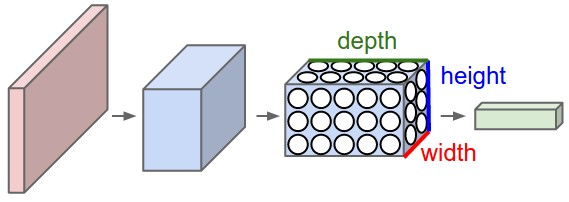

- La meta es reducir el ancho/alto y aumentar la profundidad
- Transformar información espacial en features (feature maps)

In [2]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from fnn_helper import PlotLosses
from MNIST_helper import plot_numbers, visualize_input
import draw_nn
from IPython.display import YouTubeVideo

## Intro CNNs:

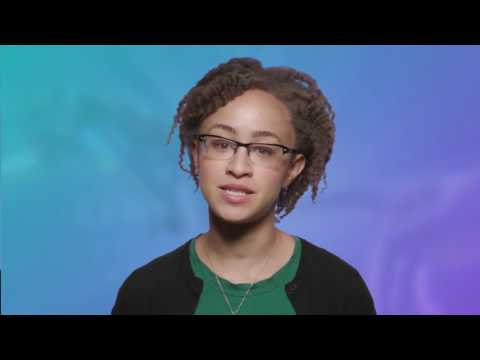

In [4]:
YouTubeVideo('HrYNL_1SV2Y')

## Capas convolucionales

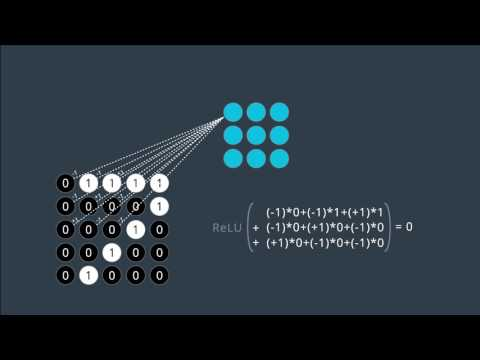

In [6]:
YouTubeVideo('h5R_JvdUrUI')

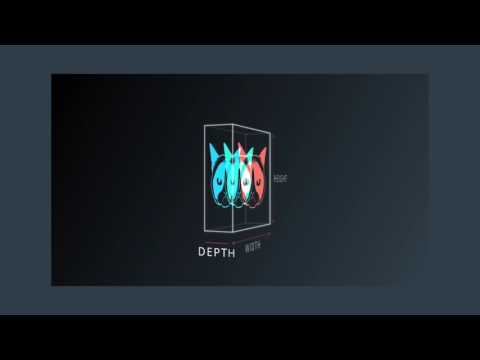

In [7]:
YouTubeVideo('RnM1D-XI--8')

## Capas pooling

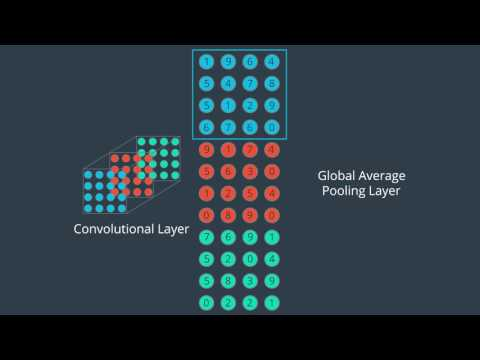

In [8]:
YouTubeVideo('OkkIZNs7Cyc')

## CNN en clasificación de imágenes

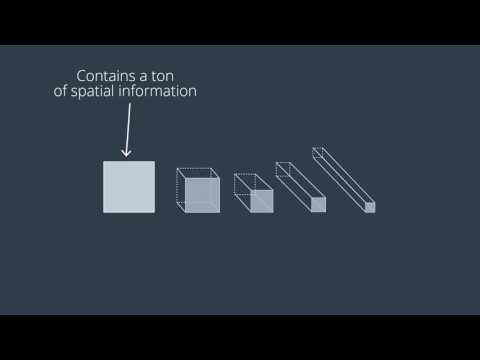

In [9]:
YouTubeVideo('l9vg_1YUlzg')

## Resumen videos

### Capa convolucional:
**Su función es aumentar la profundidad (espacialidad --> features)**
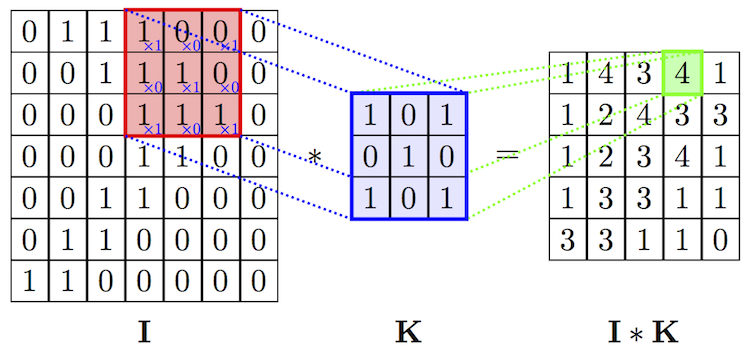
- [Ver Ejemplo Auto](https://github.com/udacity/aind2-cnn/blob/master/conv-visualization/conv_visualization.ipynb)

#### Hyperparámetros
- Para aumentar la cantidad de nodos de una CNN: Aumento la **cantidad de filtros**
- Para incrementar el tamaño de los patrones detectados: Aumento el **tamaño del filtro**
- **Stride**: Paso. Determina el tamaño de los filtros del siguiente nivel
- **Padding**: Que hacemos con los bordes?
- [Video](https://youtu.be/Qt5SQNcQfgo)

#### Como usamos esto en [keras](https://keras.io/layers/convolutional/)?

In [11]:
from keras.models import Sequential
from keras.layers import Convolution2D

In [79]:
model = Sequential()
model.add(Convolution2D(filters=1, strides=2, kernel_size=5, padding='same',activation='relu',input_shape=(32,32,1)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 14, 14, 1)         26        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


Hacer pruebas y explicar 'Output Shape' y 'Param #':
- filters=1, strides=1, kernel_size=1, padding='same'
- filters=16, strides=1, kernel_size=1, padding='same'
- filters=1, strides=1, kernel_size=4, padding='same'
- filters=10, strides=1, kernel_size=4, padding='same'
- filters=1, strides=2, kernel_size=5, padding='same'
- filters=1, strides=2, kernel_size=5, padding='valid'

### Capa Pooling
**Su función es reducir la cantidad de paramtros, bajar la dimensionalidad**

Max Pooling
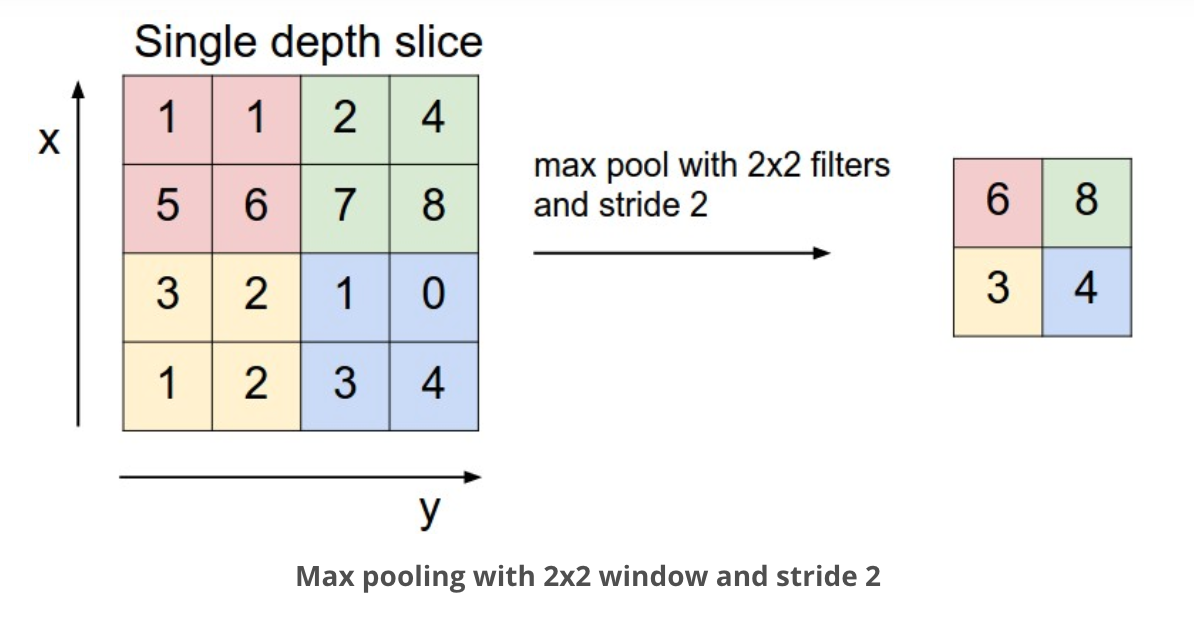

Global Average Pooling
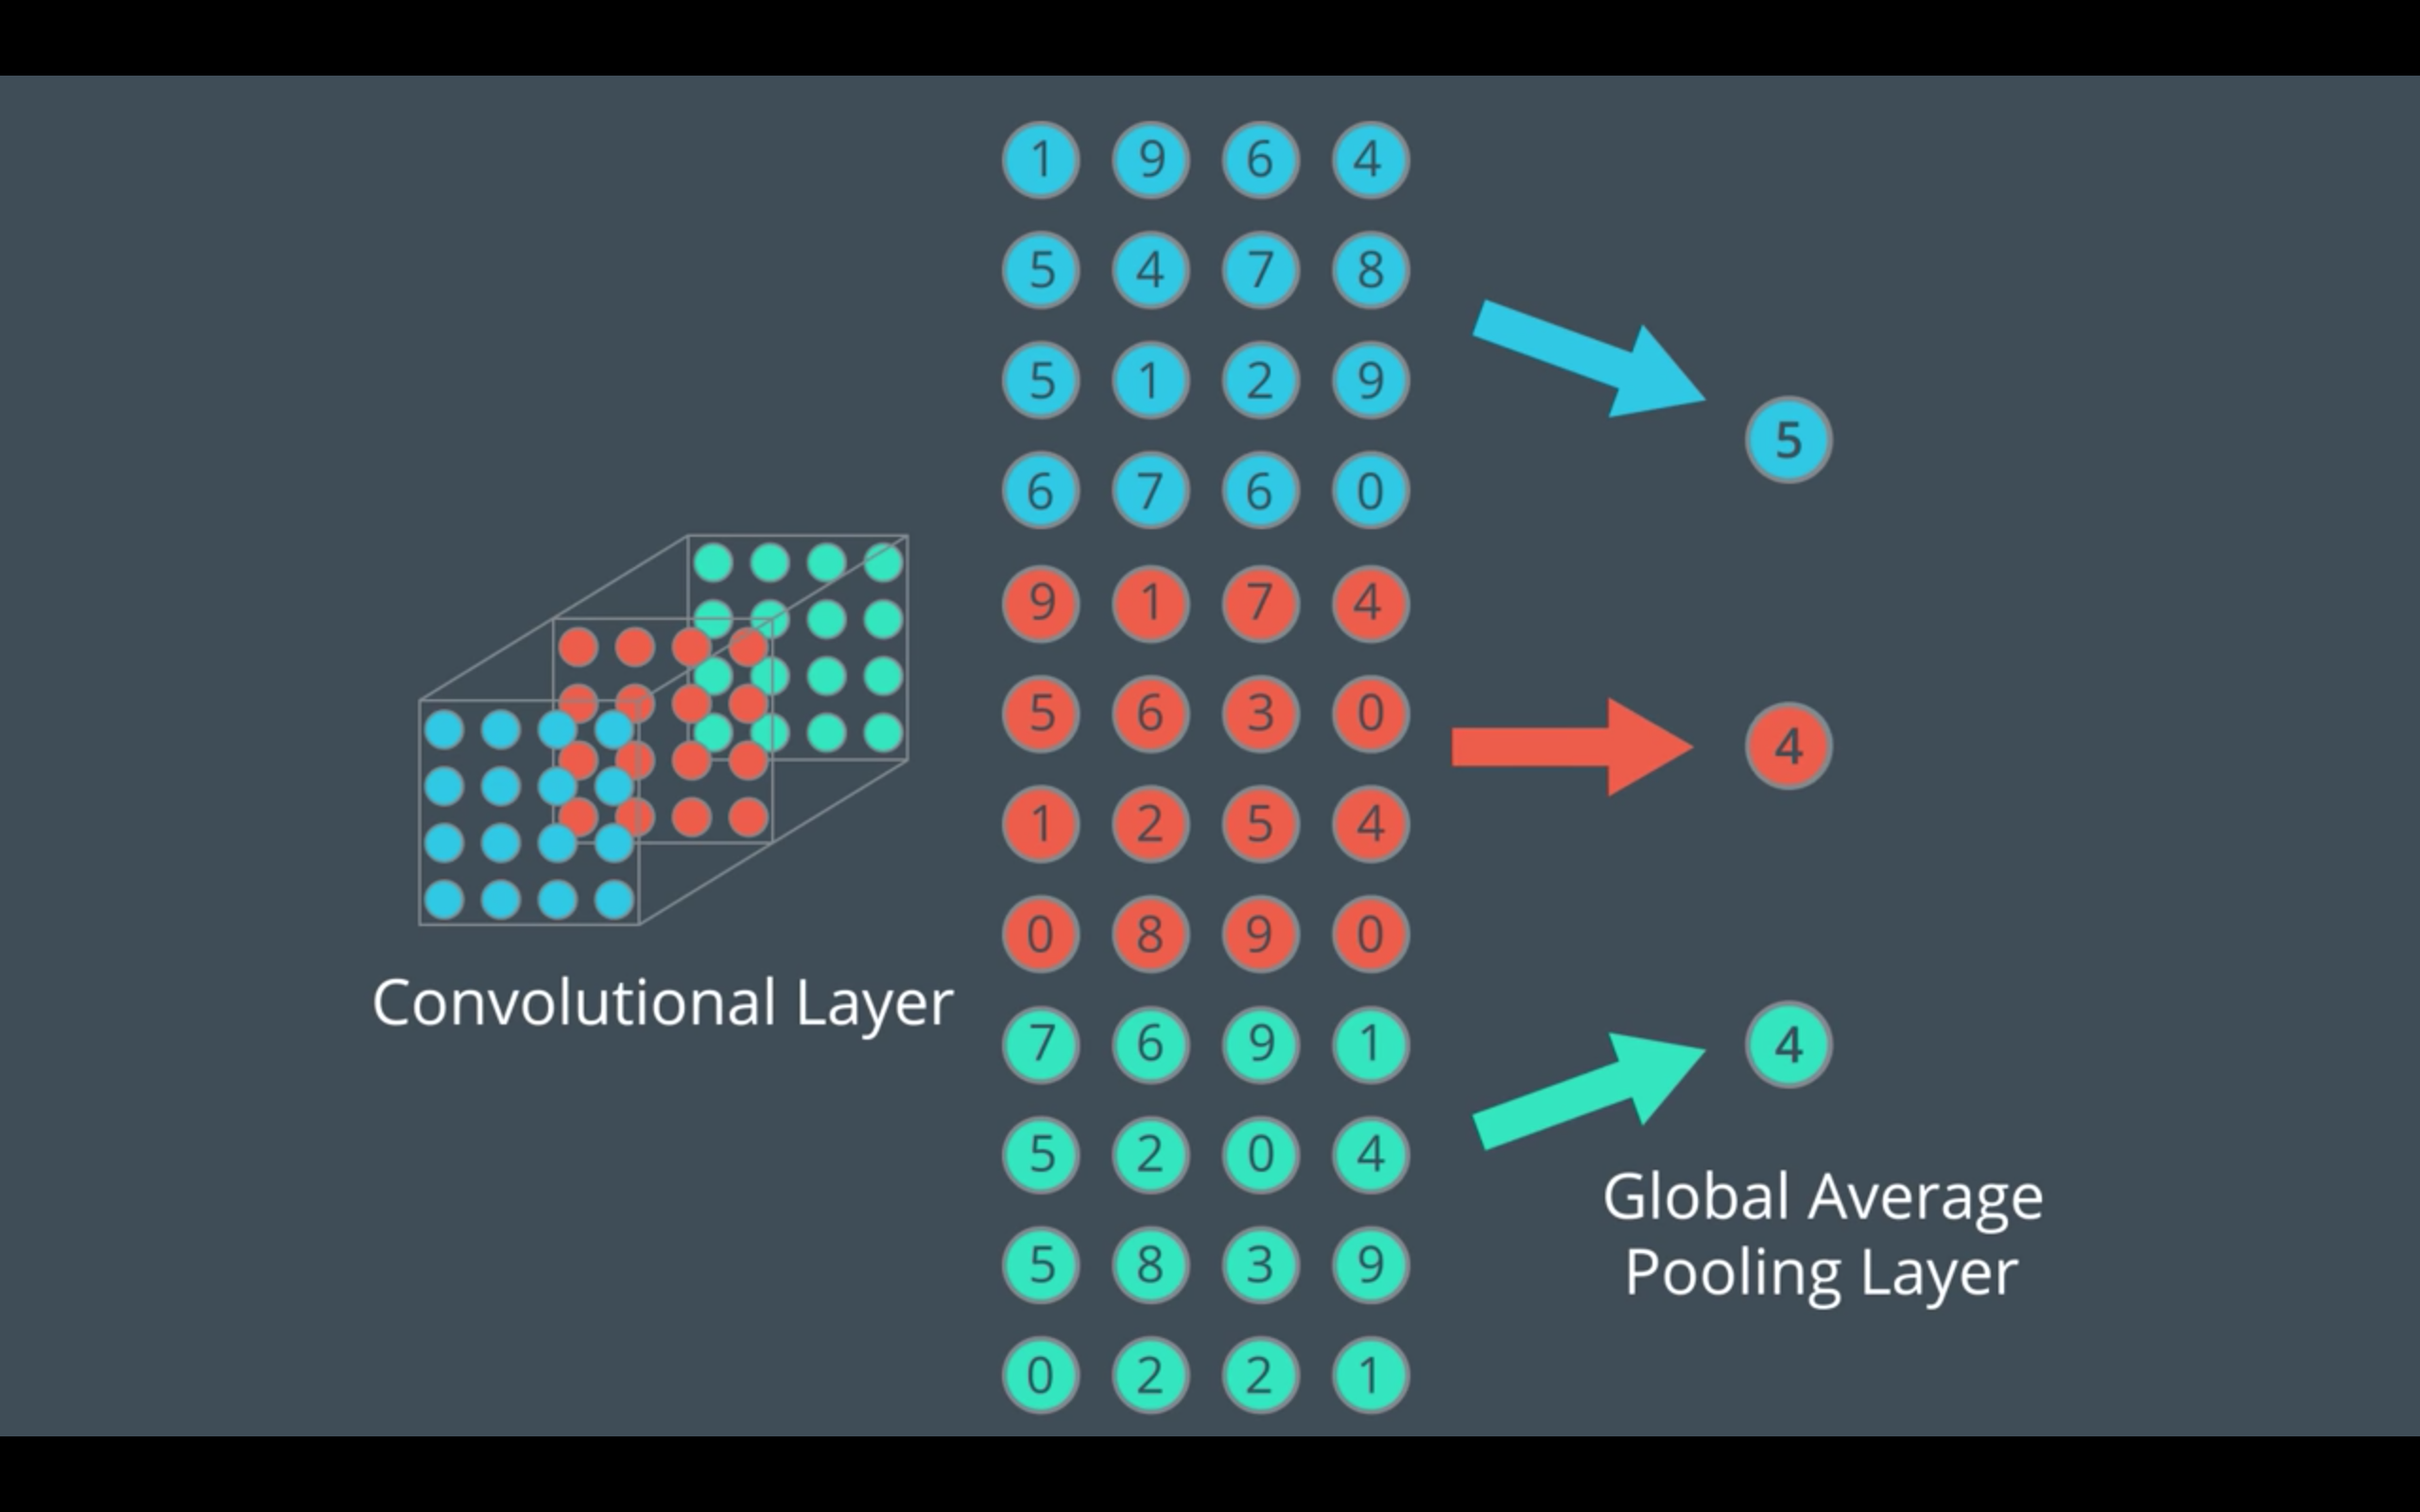

#### Hyperparámetros
MaxPooling
- Pool size
- Strides: En este caso esta en None por default lo que significa que strides=pool_size

#### En [keras](https://keras.io/layers/pooling/)

In [80]:
from keras.layers import MaxPooling2D

In [103]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(4,2), strides=None, padding='same', input_shape=(32,32,1)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_20 (MaxPooling (None, 8, 16, 1)          0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


Hacer pruebas y explicar 'Output Shape' y 'Param #':
- pool_size=(2,2), strides=None, padding='same'
- pool_size=(4,2), strides=None, padding='same'
- pool_size=(3,3), strides=None, padding='same'
- pool_size=(3,3), strides=None, padding='valid'


## Ejemplo con Keras

In [130]:
from keras.datasets import mnist
validation = 0.20

(x, y), (x_test, y_test) = mnist.load_data()

x = x/255
x_test = x_test/255


N_validation_split = int(x.shape[0]*(1-validation))
x_train = x[:N_validation_split]
y_train = y[:N_validation_split]

x_val = x[N_validation_split:]
y_val = y[N_validation_split:]

x_train = x_train.reshape(x_train.shape + (1,))
x_val = x_val.reshape(x_val.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

In [131]:
x_train.shape

(48000, 28, 28, 1)

In [132]:
print('Training set data:', x_train.shape)
print('Training labels:', y_train.shape)
print()
print('CV set data:', x_val.shape)
print('CV labels:', y_val.shape)
print()
print('Testing set data:',x_test.shape)
print('Testing labels:', y_test.shape)

Training set data: (48000, 28, 28, 1)
Training labels: (48000,)

CV set data: (12000, 28, 28, 1)
CV labels: (12000,)

Testing set data: (10000, 28, 28, 1)
Testing labels: (10000,)


In [133]:
y_train_categorical = keras.utils.to_categorical(y_train)
y_val_categorical = keras.utils.to_categorical(y_val)
y_test_categorical = keras.utils.to_categorical(y_test)
y_train_categorical.shape

(48000, 10)

In [134]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.utils import np_utils

In [135]:
x_test.shape[1:]

(28, 28, 1)

In [136]:
# kernel_size tipicamente entre 2 y 5 (2x2, 5x5)
# input_shape=(alto,ancho,cantidad de canales) blanco y negro el utlimo es 1

In [137]:
def get_model():
    model = Sequential()
    model.add(Convolution2D(filters=6, strides=1, kernel_size=6, padding='same',activation='relu',input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Convolution2D(filters=12, strides=1, kernel_size=5, padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Convolution2D(filters=24, strides=1, kernel_size=4, padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(GlobalAveragePooling2D())
    #model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model
model = get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 28, 28, 6)         222       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 14, 14, 12)        1812      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 7, 7, 12)          0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 7, 7, 24)          4632      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 3, 3, 24)          0         
_________________________________________________________________
global_average_pooling2d_8 ( (None, 24)                0         
__________

[Ver animación](http://cs231n.github.io/convolutional-networks/#conv)

In [138]:
# Cantidad de parametros
features_maps=14
filters=28
kernel_size = 2
features_maps*filters*kernel_size*kernel_size+filters

1596

In [139]:
model = get_model()
adam = optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

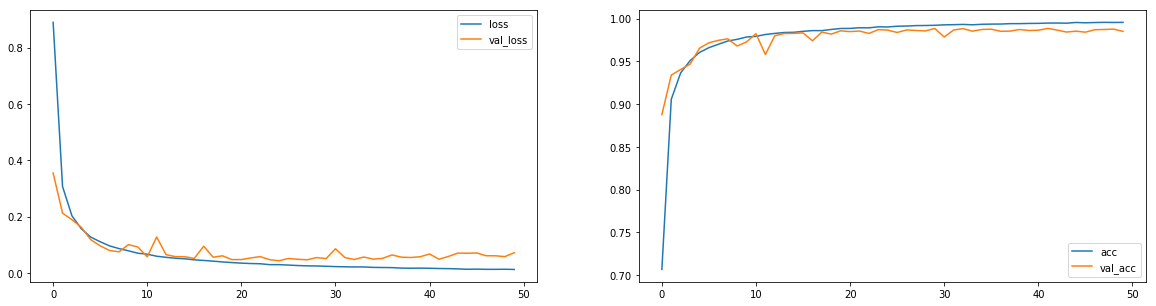

Epoch 00049: val_loss did not improve
48000/48000 [==============================] - 49s - loss: 0.0122 - acc: 0.9958 - val_loss: 0.0717 - val_acc: 0.9853


In [140]:
from keras.callbacks import ModelCheckpoint 
checkpointer = ModelCheckpoint(filepath='cnn.mnist.hdf5', verbose=1, save_best_only=True)
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_val, y_val_categorical=y_val_categorical)

model.fit(x_train, 
          y_train_categorical,
          epochs=50, batch_size=100, 
          #verbose=1, 
          validation_data=(x_val, y_val_categorical), 
          callbacks=[plot_losses, checkpointer],
         )

In [141]:
def get_errors(model, x_test, y_test):
    predicted = model.predict(x_test)
    predicted_numbers = predicted.argmax(axis=1)
    accuracy = (predicted_numbers==y_test).sum()/predicted_numbers.shape[0]
    error_indexes = np.where((predicted_numbers==y_test)==False)[0]
    error = error_indexes.shape[0]/predicted_numbers.shape[0]
    return accuracy, error, error_indexes, predicted_numbers
accuracy, error, error_indexes, predicted_numbers = get_errors(model, x_test, y_test)
print(accuracy, error, accuracy + error)
print(predicted_numbers.shape)
(y_test[error_indexes[:20]]==predicted_numbers[error_indexes[:20]]).sum()

0.9862 0.0138 1.0
(10000,)


0

[2 4 2 5 9 2 6 8 1 6]
[2 2 5 7 1 5 4 2 2 6]

[7 9 7 3 4 8 0 2 8 4]
[4 7 3 2 7 8 9 3 8 0]


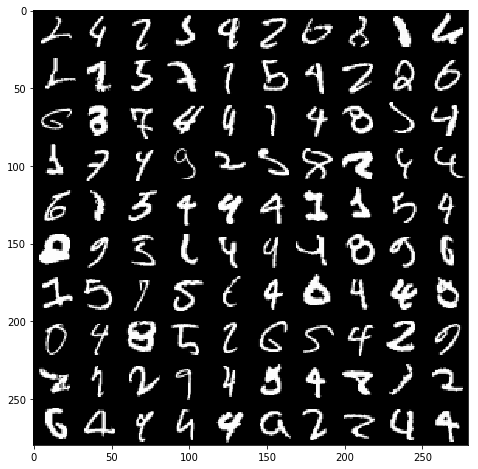

In [142]:
from MNIST_helper import plot_numbers, visualize_input
print(y_test[error_indexes[:10]])
print(y_test[error_indexes[10:20]])
print()
print(predicted_numbers[error_indexes[:10]])
print(predicted_numbers[error_indexes[10:20]])
plot_numbers(x_test[:,:,:,0],error_indexes[:100], columns=10, figsize=(8, 8))

In [143]:
# Cargo los valores del modelo
model.load_weights('cnn.mnist.hdf5')
score = model.evaluate(x_test, y_test_categorical, verbose=0)
print("loss: ", score[0])
print("accuracy: ", score[1])

loss:  0.0343502885365
accuracy:  0.9886


Por que en este caso no hay tanta mejora de CNN contra MLP?
MNIST:
- Imagenes ya preprocesadas
- Todas de igual tamaño con dígitos centrados
- Los digitos tienen casi todos los mismos tamaños
- No es algo que suela pasar en la práctica
- Regularización

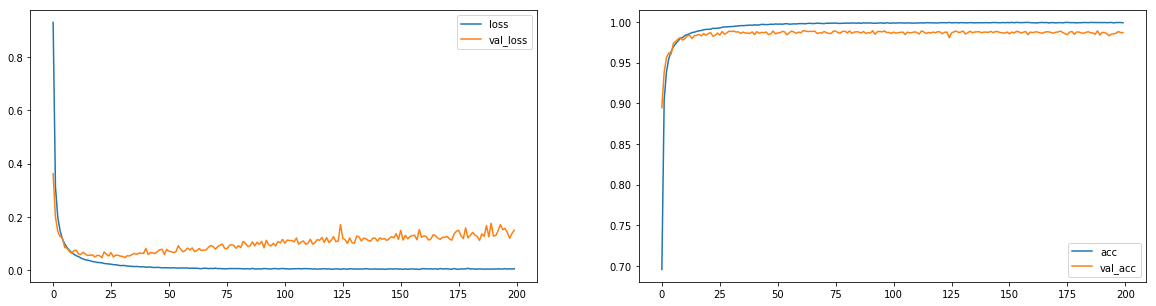

Epoch 00199: val_loss did not improve
48000/48000 [==============================] - 38s - loss: 0.0048 - acc: 0.9989 - val_loss: 0.1498 - val_acc: 0.9868


In [144]:
model_2 = get_model()
model_2.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='cnn2.mnist.hdf5', verbose=1, save_best_only=True)
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_val, y_val_categorical=y_val_categorical)

model_2.fit(x_train, 
          y_train_categorical,
          epochs=200, batch_size=100, 
          #verbose=1, 
          validation_data=(x_val, y_val_categorical), 
          callbacks=[plot_losses, checkpointer],
         )

In [145]:
score = model_2.evaluate(x_test, y_test_categorical, verbose=0)
print("loss: ", score[0])
print("accuracy: ", score[1])

loss:  0.128119136678
accuracy:  0.9877


In [146]:
# Cargo los valores del modelo
model_2.load_weights('cnn.mnist.hdf5')
score = model_2.evaluate(x_test, y_test_categorical, verbose=0)
print("loss: ", score[0])
print("accuracy: ", score[1])

loss:  0.0343502885365
accuracy:  0.9886
